In [1]:
import numpy as np
import math , copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importation du donnees de regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('Cellphone.csv')

In [5]:
data

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [4]:
df=data.drop(columns=['Product_id','Sale','weight','resoloution','ppi','cpu freq','cpu core','RearCam','Front_Cam','thickness'],axis=1)

In [5]:
df.shape

(161, 4)

In [6]:
df.dtypes

Price             int64
internal mem    float64
ram             float64
battery           int64
dtype: object

Changement de type de donnees

In [7]:
df['ram'] = df['ram'].astype('int64')
df['internal mem'] = df['internal mem'].astype('int64')

In [8]:
df.dtypes

Price           int64
internal mem    int64
ram             int64
battery         int64
dtype: object

In [9]:
df.head()

,Price,internal mem,ram,battery
0,2357,16,3,2610
1,1749,4,1,1700
2,1916,8,1,2000
3,1315,4,0,1400
4,1749,4,1,1700


Analyse exploratoire du donnees 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         161 non-null    int64
 1   internal mem  161 non-null    int64
 2   ram           161 non-null    int64
 3   battery       161 non-null    int64
dtypes: int64(4)
memory usage: 5.2 KB


In [11]:
# Describe
df.describe()

,Price,internal mem,ram,battery
count,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,24.496894,2.149068,2842.111801
std,768.187171,28.808880,1.666625,1366.990838
min,614.000000,0.000000,0.000000,800.000000
25%,1734.000000,8.000000,1.000000,2040.000000
50%,2258.000000,16.000000,2.000000,2800.000000
75%,2744.000000,32.000000,3.000000,3240.000000
max,4361.000000,128.000000,6.000000,9500.000000


In [17]:
# Shape of the Dataset
print('Shape of Training dataset:', df.shape)
df.isnull().sum()

Shape of Training dataset: (161, 4)


Price           0
internal mem    0
ram             0
battery         0
dtype: int64

Observations du variables

In [18]:
corr = df.corr()
corr.shape

(4, 4)

<AxesSubplot:>

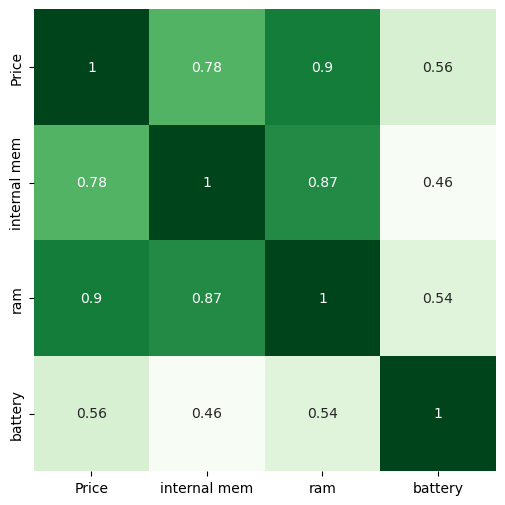

In [19]:
# visualisations du variables
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar=False, square= True, annot=True, cmap = 'Greens')

In [20]:
# Verefication du valeur manquante 
#sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

<AxesSubplot:xlabel='Price', ylabel='count'>

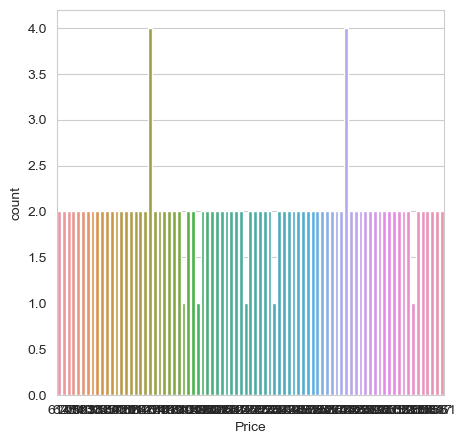

In [21]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x = 'Price', data = df)

<AxesSubplot:xlabel='ram', ylabel='count'>

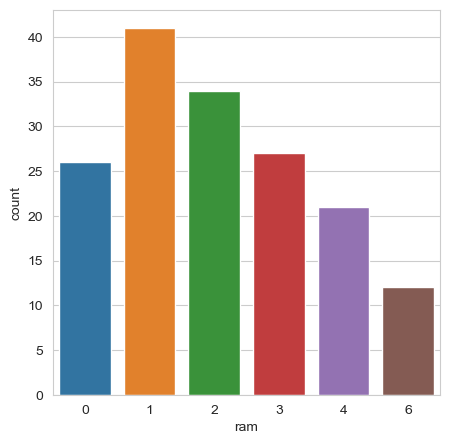

In [22]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x = 'ram', data = df)

<AxesSubplot:xlabel='battery', ylabel='count'>

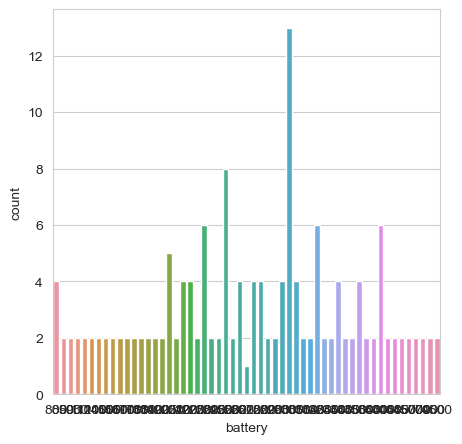

In [23]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x = 'battery', data = df)

<AxesSubplot:xlabel='internal mem', ylabel='count'>

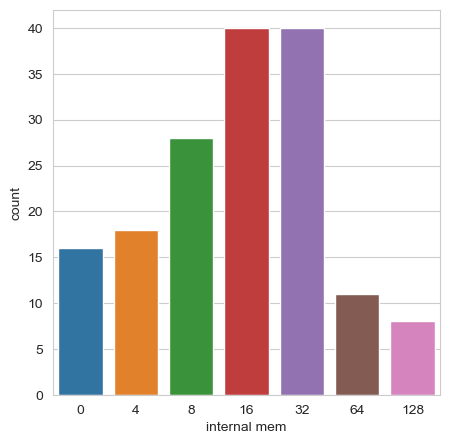

In [24]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x = 'internal mem', data = df)

<Figure size 100x100 with 0 Axes>

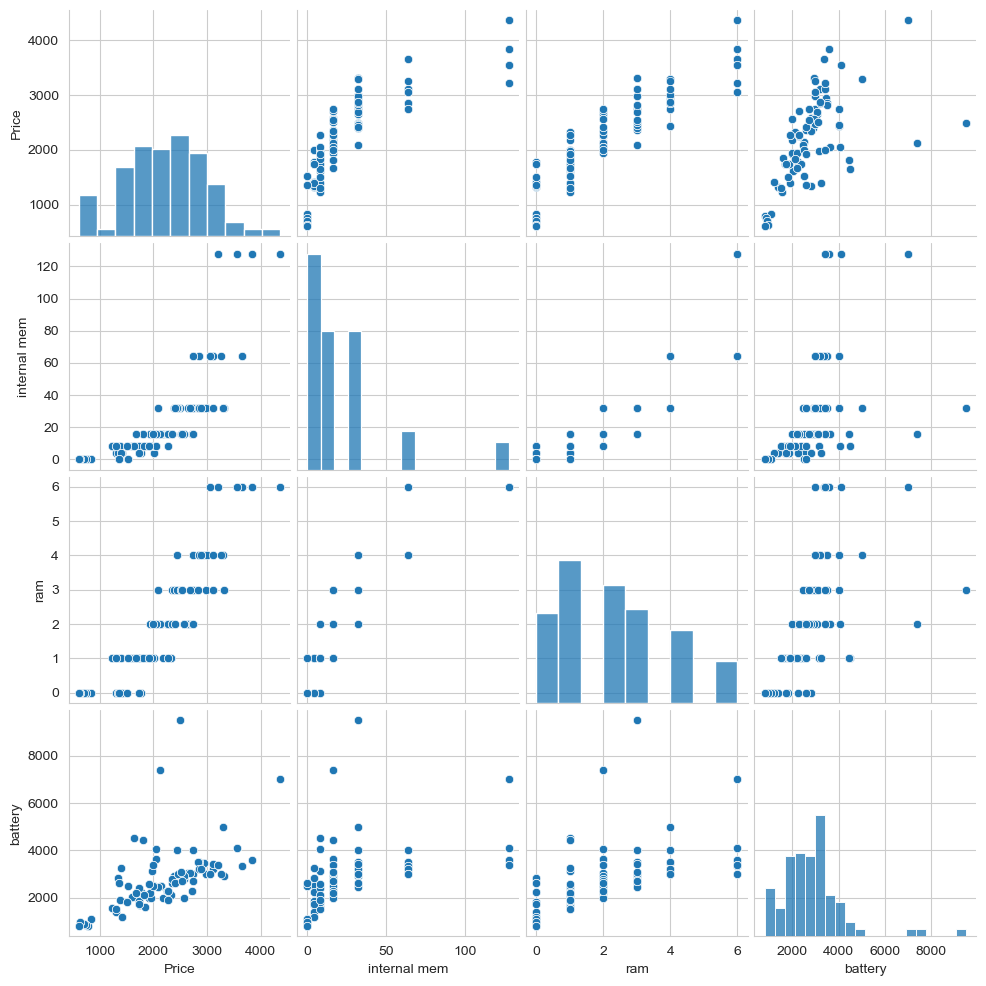

In [25]:
plt.figure(figsize=(1,1))
sns.pairplot(data=df)

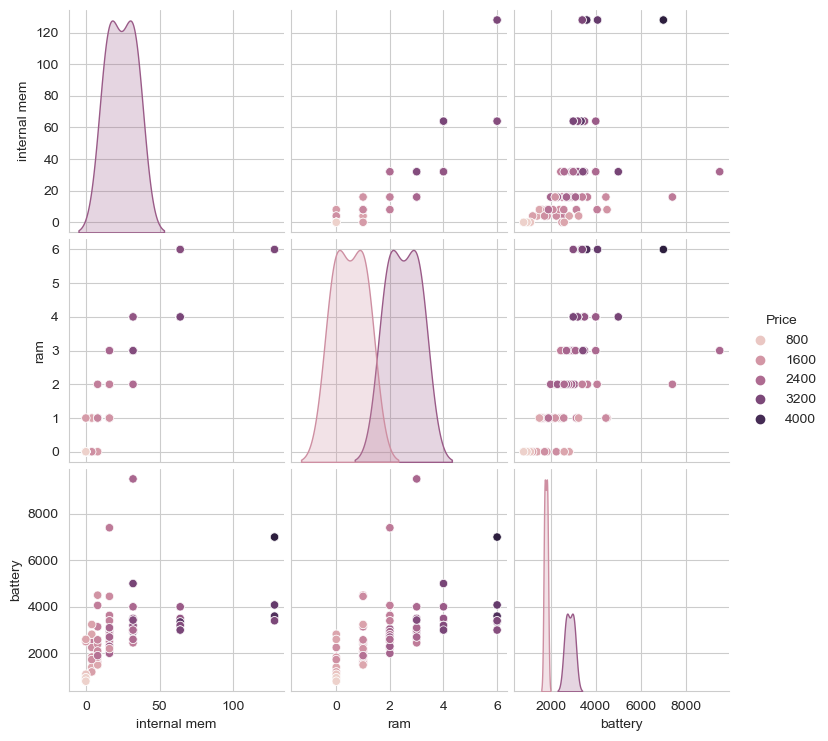

In [26]:
sns.pairplot(df,hue='Price')

In [27]:
# Choix du variables cible pour notre model 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
x = df.drop(['Price'], axis = 1) # independant colonnes

In [29]:
x

,internal mem,ram,battery
0,16,3,2610
1,4,1,1700
2,8,1,2000
3,4,0,1400
4,4,1,1700
...,...,...,...
156,128,6,4080
157,128,6,3400
158,64,4,3000
159,128,6,3400


In [30]:
x = np.array(x)
x

array([[  16,    3, 2610],
       [   4,    1, 1700],
       [   8,    1, 2000],
       [   4,    0, 1400],
       [   4,    1, 1700],
       [  16,    2, 2500],
       [   8,    1, 1560],
       [  16,    2, 2500],
       [   4,    0, 1400],
       [  16,    2, 2800],
       [  32,    4, 4000],
       [   4,    1, 2500],
       [  16,    1, 2000],
       [  32,    3, 3000],
       [  16,    2, 2800],
       [   8,    1, 2040],
       [  16,    2, 2300],
       [  32,    4, 3450],
       [   8,    1, 2040],
       [   8,    1, 1560],
       [  32,    4, 4000],
       [  32,    3, 2900],
       [  32,    4, 3000],
       [  32,    3, 3000],
       [  16,    2, 2200],
       [   8,    1, 1905],
       [   4,    1, 2500],
       [  32,    4, 3450],
       [   8,    1, 1905],
       [   8,    1, 2000],
       [  16,    2, 2300],
       [  32,    4, 3000],
       [  32,    3, 2930],
       [  32,    2, 3050],
       [   4,    0, 1200],
       [  32,    2, 3050],
       [  16,    2, 2200],
 

In [31]:
y = np.array(df['Price'])  # target

In [32]:
y

array([2357, 1749, 1916, 1315, 1749, 2137, 1238, 2137, 1315, 2580, 2438,
       2006, 2174, 2744, 2580, 1612, 2258, 2938, 1612, 1238, 2438, 2392,
       2977, 2744, 1942, 1390, 2006, 2938, 1390, 1950, 2258, 2977, 3316,
       2654, 1421, 2654, 1942, 2124, 1777, 2392, 2124, 2087, 1843, 2087,
       2859, 1989, 1421, 3316, 1843, 2685, 1741, 1347, 2859, 3658, 1984,
       1777, 3658, 1984, 1989, 1741, 2824, 2746, 1347, 2323, 2685, 2824,
       2746, 2044, 1734, 2323, 1734, 2276, 2044, 3116, 2571, 2276, 2571,
       1396, 2714, 3005, 2714,  791, 3005, 3837, 1646, 1396,  791, 3837,
       1302, 1302, 1646, 1831, 1831, 1810, 1511, 1810, 2562, 2562, 1522,
       1511, 2343,  833, 1522, 2343, 2744,  833, 2744, 1676, 1676, 2858,
        754, 2975, 2975,  754, 2880, 2858, 3287, 3287, 2054, 1734, 1734,
       2054, 2001, 2001, 2880,  705,  705, 2491, 2491, 2466, 1357, 1357,
       2466, 2266, 2266, 2445, 2445, 3116, 2409, 2409,  628,  628, 2508,
       2508, 1921, 1921, 3102, 3102, 3055,  614,  6

In [33]:
#y = np.array(y)
#y

In [34]:
# Diviser la data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=50)

In [35]:
print(x_train.shape, x_test.shape)

(107, 3) (54, 3)


In [36]:
# Le model e utilisant regression lineaire

In [37]:
F = LinearRegression()

In [38]:
F

LinearRegression()

In [39]:
F.fit(x, y)

LinearRegression()

In [40]:
# Je etablie les weights w (poids) w0 w1 w2 w3
F.coef_     # w1, w2 et w3
F.intercept_    # w0

1214.5623792446372

In [41]:
(F.coef_, F.intercept_)

(array([1.21146101e-01, 3.84161244e+02, 6.06863637e-02]), 1214.5623792446372)

In [42]:
w0 = F.intercept_
w1 = F.coef_[0]
w2 = F.coef_[1]
w3 = F.coef_[2]

In [43]:
def f(x1,x2,x3):
    return w0 + w1 * x1 + w2 * x2 + w3 * x3 

In [44]:
y_predict = F.predict([[  4,    1, 1700]])

In [45]:
y_predict

array([1702.3750259])

In [46]:
x[4]

array([   4,    1, 1700], dtype=int64)

In [47]:
y_predict_f = f(4, 1, 1700)

In [48]:
y_predict_f

1702.3750259014892

In [49]:
# La fonction du cout 
# le model est : Y_pred = w0 + w1*x1 + w2*x2 + w3*x3

In [50]:
b_init = 0
w_init = np.array([0.0,0.0,0.0])

In [68]:
b_init = 0
w_init = np.array([0.0,0.0,0.0])

def cost_function(x,y,b,w):
    m = x.shape[0]
    error = 0.0
    for i in range(m):
        fwb = np.dot(x[i],w) + b
        error = error + (fwb - y[i])**2
    cost = error / (2*m)
    return cost

print(cost_function(x_train,y_train,b_init,w_init))


2731877.2757009347


In [69]:
#Descent du Gradiant

In [70]:
def Gradient_Descent(x,y,w,b):
    m,n = x.shape
    dw = np.zeros(n)
    db = 0
    for i in range(m):
        Fwb = np.dot(x[i],w) + b
        error = Fwb - y[i]
        
        for j in range(n):
            dw[j] = dw[j] + error * x[i,j]
            
        db = db + error
        
    dw = dw / m
    db = db / m
    
    return dw , db

w , b = Gradient_Descent(x_train,y_train,w_init,b_init)
print('bias:',b)
print('weights:',w)

bias: -2215.411214953271
weights: [-6.79798879e+04 -5.83597196e+03 -6.69438159e+06]


In [71]:
# Linear Regression et Gradient Descent

In [72]:
def gradient_descent(x, y, w_in, b_in, cost_function, Gradient_Descent, alpha, num_iters):
    history = []
    b = b_in
    w = copy.deepcopy(w_in)

    for i in range(num_iters):
        d_w,d_b = Gradient_Descent(x, y, w_in, b_in)
        
        w = w - alpha * d_w
        b = b - alpha * d_b
        
        if i<100000:
            history.append(cost_function(x, y, b, w))
        
        if i% math.ceil(num_iters / 10) == 0:
            print('iteration:',i,' Cost:',history[-1])
                
    return w, b, history

w_final, b_final, J_hist = gradient_descent(x_train,y_train,w_init,b_init,cost_function, Gradient_Descent, 1e-9,10000) 
print("\n b,w found by gradient descent:")
print('bias:',b_final)
print('weights::',w_final)

iteration: 0  Cost: 2687267.61148331
iteration: 1000  Cost: 168028214.67014474
iteration: 2000  Cost: 752850902.5405685
iteration: 3000  Cost: 1757155331.2229517
iteration: 4000  Cost: 3180941500.7174025
iteration: 5000  Cost: 5024209411.023836
iteration: 6000  Cost: 7286959062.142251
iteration: 7000  Cost: 9969190454.072659
iteration: 8000  Cost: 13070903586.81505
iteration: 9000  Cost: 16592098460.369417

 b,w found by gradient descent:
bias: 0.022154112149533695
weights:: [6.79798879e-01 5.83597196e-02 6.69438159e+01]


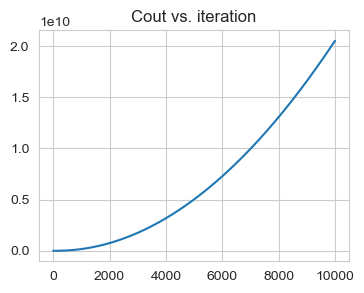

In [73]:
plt.figure(figsize=(4,3))
plt.plot(J_hist)
plt.title("Cout vs. iteration" )
plt.show()

In [74]:
pred = np.zeros(54)
for i in range(0,54):
    pred[i] = np.dot(x_test[i], w_final) + b_final
    print('prediction:', pred[i],'target value:' ,y_test[i])

ValueError: shapes (54,) and (3,) not aligned: 54 (dim 0) != 3 (dim 0)

In [ ]:
# Visualisation du donnees

In [ ]:
x_test = pd.DataFrame(x_test)
features = x_test.columns
f = 0
fig,ax = plt.subplots(2,3,figsize=(15,10))
for i in range(0,2):
    for j in range(0,3):
        ax[i][j].scatter(x_test[features[f]] , y_test)
        ax[i][j].scatter(x_test[features[f]] , pred)
        ax[i][j].set_xlabel(features[f])
        ax[i][j].set_ylabel('Price')
        f = f+1
        
plt.show()

In [ ]:
# appliquer standarisations pour ameliorer l'apprentissage

In [ ]:
def standardization(col):
    mean = x_train[col].mean()
    std = x_train[col].std()
    if (std != 0):
        x_train[col] = x_train[col].map(lambda p : (p-mean)/std)

x_train = pd.DataFrame(x_train)
for i in x_train.columns:
    standardization(i)
    
x_test = pd.DataFrame(x_test)
for i in x_test.columns:
    standardization(i)

In [ ]:
f=0
fig,ax = plt.subplots(2,3,figsize=(17,10))
for i in range(0,2):
    for j in range(0,3):
        ax[i][j].scatter(x_train[f] , y_train)
        f = f+1
        
plt.show()

In [75]:
x_train  = np.array(x_train)
w_final, b_final, J_hist = gradient_descent(x_train,y_train,w_init,b_init,cost_function, Gradient_Descent, 1e-4,17000) 
print("\nb,w found by gradient descent:")
print('bias:',b_final)
print('weights::',w_final)

iteration: 0  Cost: 2092929495427.3186
iteration: 1700  Cost: 6.068636817954477e+18
iteration: 3400  Cost: 2.4260293852442706e+19
iteration: 5100  Cost: 5.457497319639418e+19
iteration: 6800  Cost: 9.70126748497983e+19
iteration: 8500  Cost: 1.5157339881263147e+20
iteration: 10200  Cost: 2.1825714508491096e+20
iteration: 11900  Cost: 2.970639136666369e+20
iteration: 13600  Cost: 3.879937045578944e+20
iteration: 15300  Cost: 4.9104651775867526e+20

b,w found by gradient descent:
bias: 3766.1990654198803
weights:: [1.15565809e+05 9.92115234e+03 1.13804487e+07]


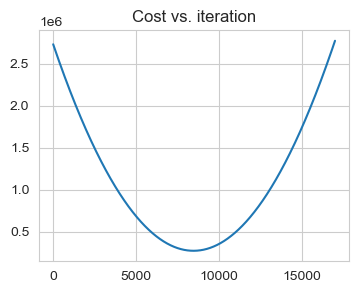

In [302]:
plt.figure(figsize=(4,3))
plt.plot(J_hist)
plt.title("Cost vs. iteration" )
plt.show()

In [304]:
x_test  = np.array(x_test)
for i in range(20):
    pred = np.dot(x_test[i],w_final) + b_final
    print('prediction:',pred,'target value:' ,y_test[i])

prediction: 1908518.577745466 target value: 2562
prediction: 2034962.2870630466 target value: 1984
prediction: 519023.4640959172 target value: 614
prediction: 2001959.2118676768 target value: 3260
prediction: 1239533.8841722163 target value: 1390
prediction: 1043092.0518793394 target value: 1843
prediction: 1502753.4815339495 target value: 2276
prediction: 1308403.9288761362 target value: 2174
prediction: 1970098.1556701076 target value: 2466
prediction: 4641967.649415302 target value: 4361
prediction: 1309532.007147513 target value: 2571
prediction: 4787518.546103369 target value: 2124
prediction: 2095527.8229510847 target value: 1396
prediction: 1193827.6091477147 target value: 1734
prediction: 712244.9384823536 target value: 833
prediction: 780493.7188519398 target value: 1421
prediction: 1970098.1556701076 target value: 2744
prediction: 519023.4640959172 target value: 791
prediction: 2034962.2870630466 target value: 1984
prediction: 1502753.4815339495 target value: 2258


In [76]:
w0 = 3766.1990654198803
w1 = 960.40556019
w2 = 1128.07827138  
w3 = 644.07158129

In [77]:
def f(x1,x2,x3):
    return w0 + w1 * x1 + w2 * x2 + w3 * x3 

In [78]:
y_predict_f = f(4, 1, 1700)

In [79]:
y_predict_f

1103657.58777056

In [80]:
# Utilisation du Scikit-Learn 

In [81]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[ 128    6 8700]
Peak to Peak range by column in Normalized X:[4.82473704 3.725011   7.28667512]


# ##creer et fit le regression model

In [83]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 183, number of weight updates: 19582.0


### Visualisation du parameters

In [84]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [-16.28456955 645.12352034  65.44921397], b:[2215.18185495]


In [85]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(x_norm)
# make a prediction using w,b. 
y_pred = np.dot(x_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[2986.06470493 1697.83895024 2584.45299799 1721.95839276]
Target values 
[2938 1843 3102 1612]


In [86]:
w0 = 2215.13720827
w1 = -19.52400442
w2 = 648.22432586  
w3 = 64.84601269

In [87]:
def f(x1,x2,x3):
    return w0 + w1 * x1 + w2 * x2 + w3 * x3 

In [88]:
y_predict_f = f(4, 1, 1700)

In [89]:
y_predict_f 

113023.48708944999

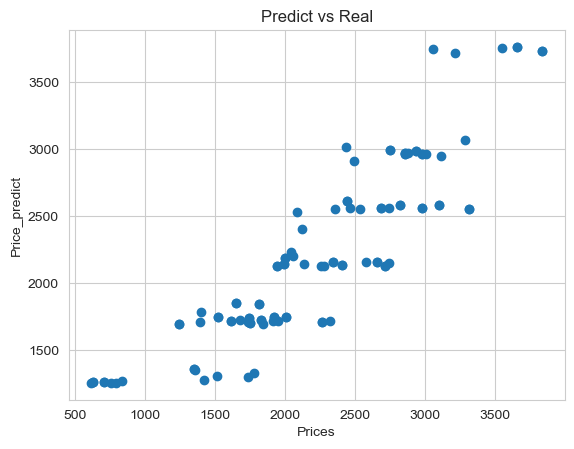

In [321]:
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Price_predict')
plt.title('Predict vs Real')
plt.show()

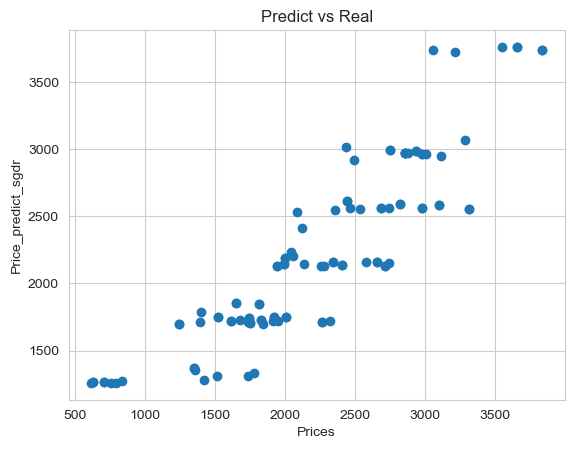

In [90]:
plt.scatter(y_train,y_pred_sgd)
plt.xlabel('Prices')
plt.ylabel('Price_predict_sgdr')
plt.title('Predict vs Real')
plt.show()